# Visualizing distributions of data
An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? Do the answers to these questions vary across subsets defined by other variables?

The distributions module contains several functions designed to answer questions such as these. The axes-level functions are histplot(), kdeplot(), ecdfplot(), and rugplot(). They are grouped together within the figure-level displot(), jointplot(), and pairplot() functions.

There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

## Plotting univariate histograms
Perhaps the most common approach to visualizing a distribution is the histogram. This is the default approach in displot(), which uses the same underlying code as histplot(). A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar

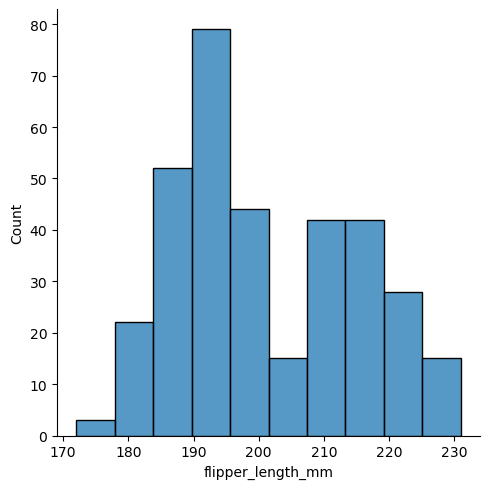

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

## Choosing the bin size
The size of the bins is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. By default, displot()/histplot() choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the binwidth parameter

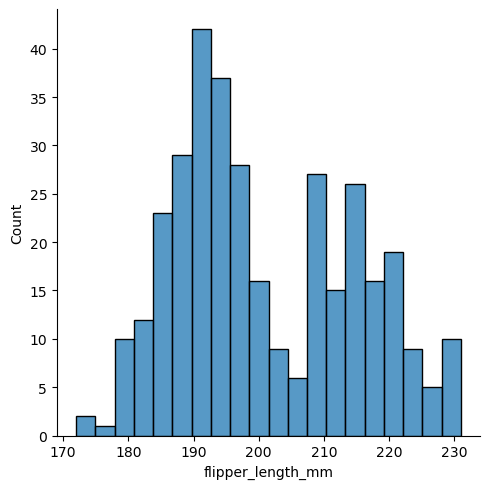

In [2]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

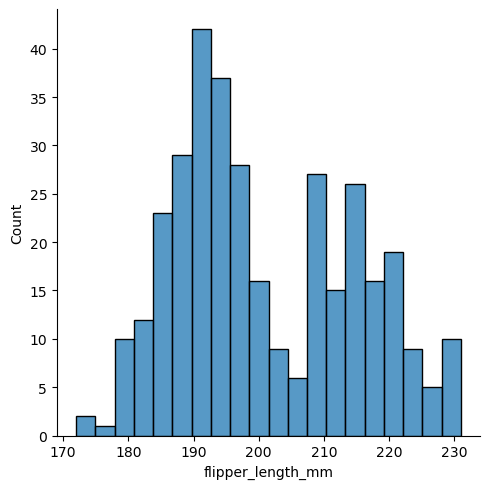

In [3]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

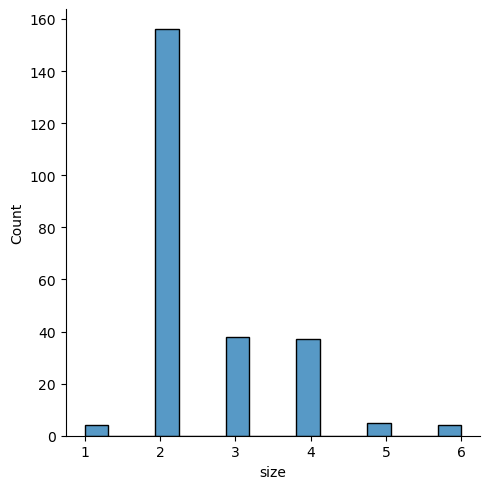

In [4]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

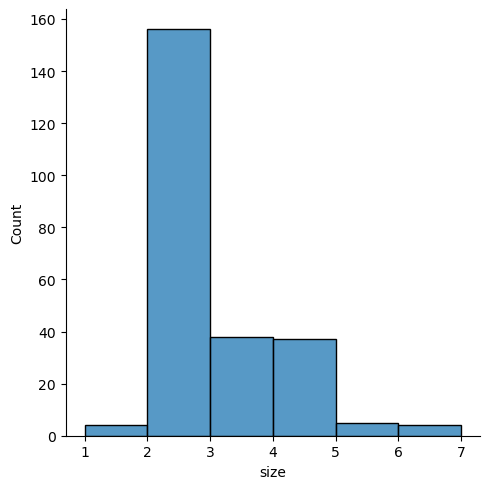

In [5]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

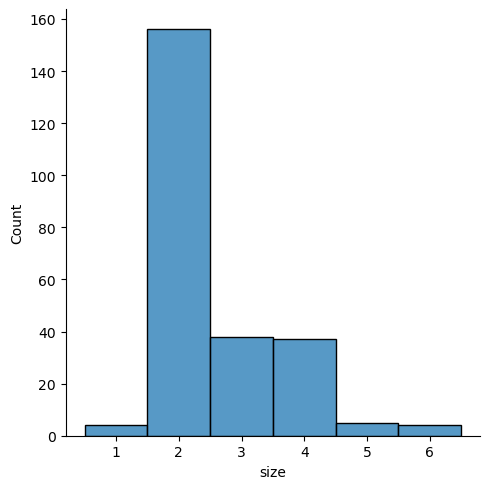

In [6]:
sns.displot(tips, x="size", discrete=True)

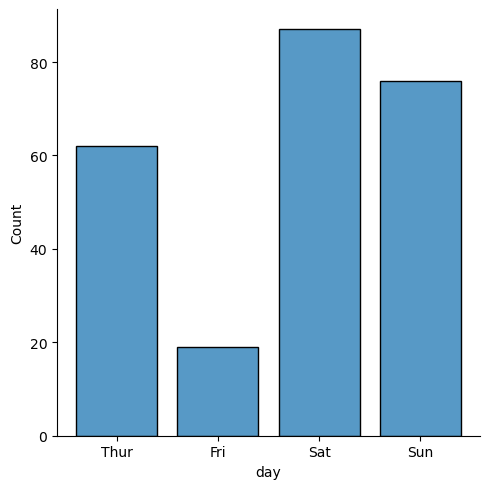

In [7]:
sns.displot(tips, x="day", shrink=.8)

### Conditioning on other variables
Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? displot() and histplot() provide support for conditional subsetting via the hue semantic. Assigning a variable to hue will draw a separate histogram for each of its unique values and distinguish them by color

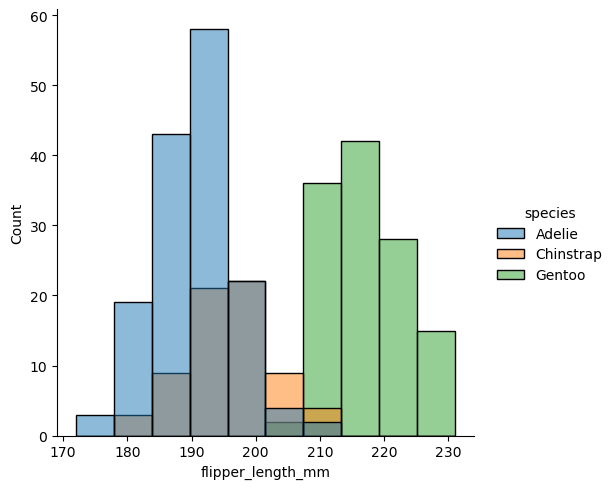

In [8]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

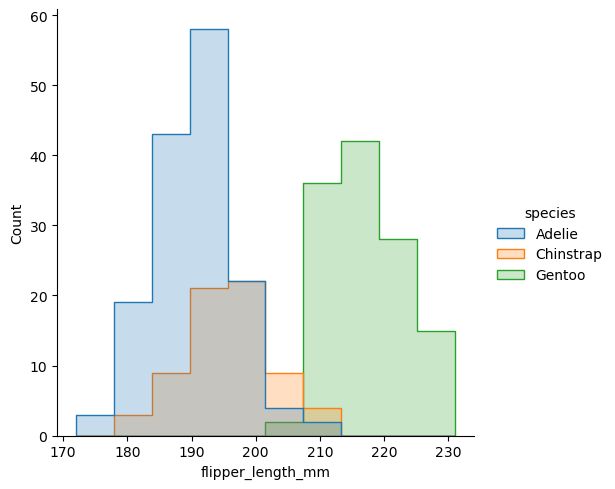

In [9]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

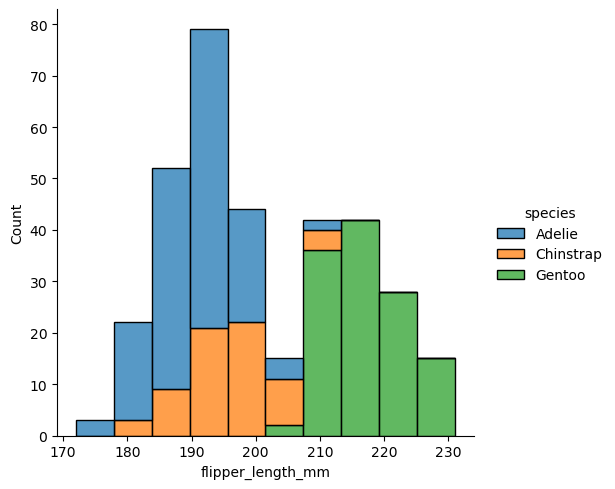

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

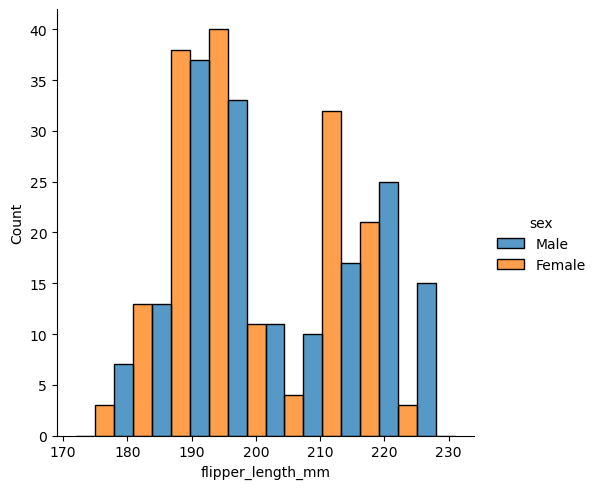

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

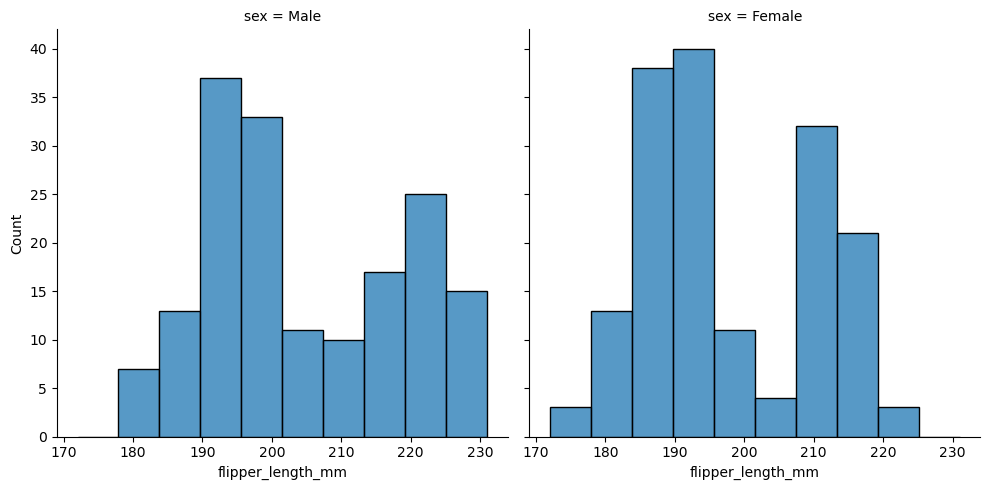

In [12]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

### Normalized histogram statistics
Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter

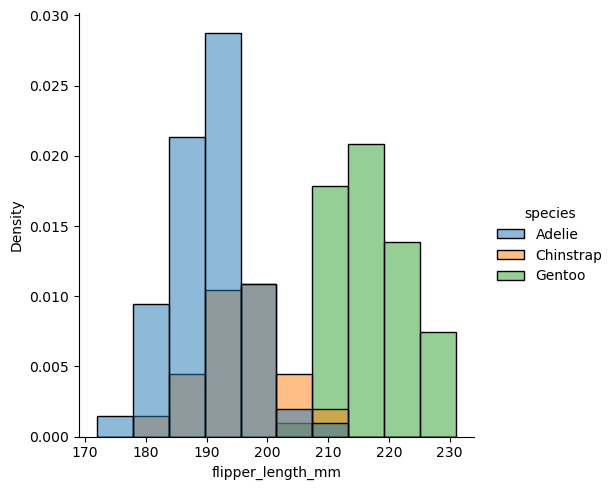

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

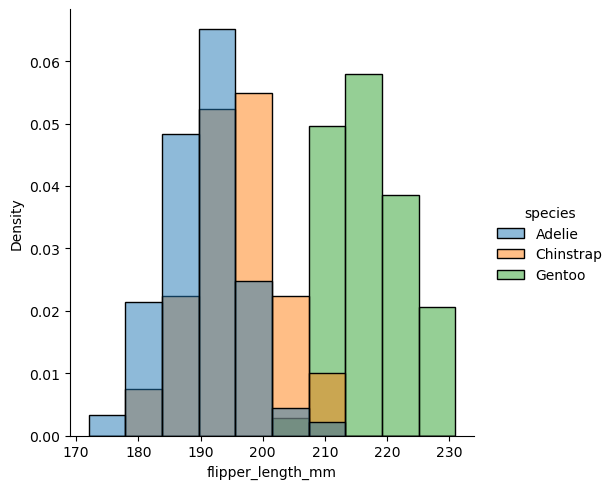

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

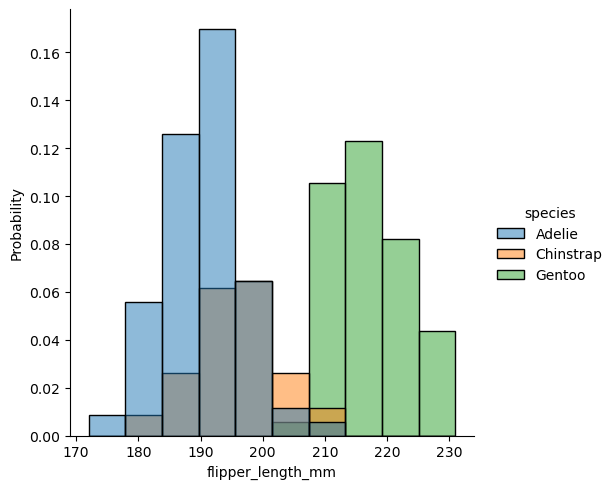

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

### Kernel density estimation
A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

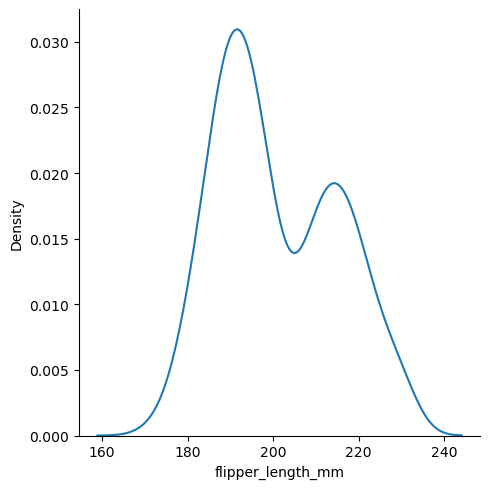

In [16]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth
Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth

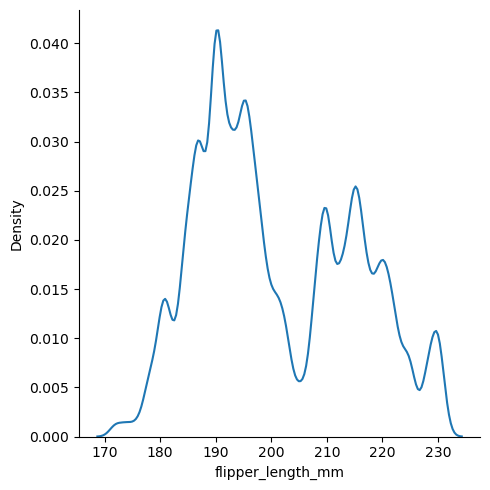

In [17]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

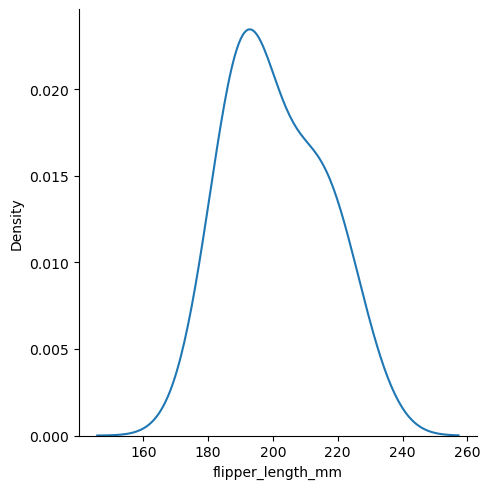

In [18]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables
As with histograms, if you assign a hue variable, a separate density estimate will be computed for each level of that variable

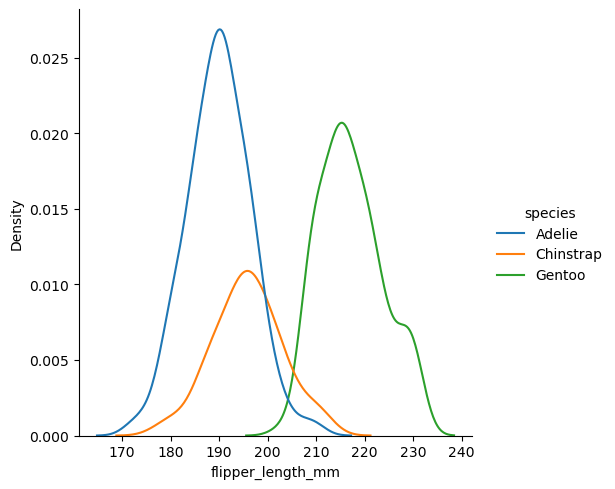

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

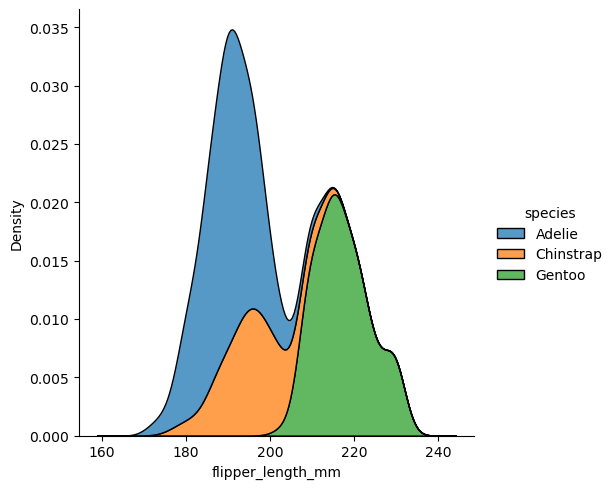

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

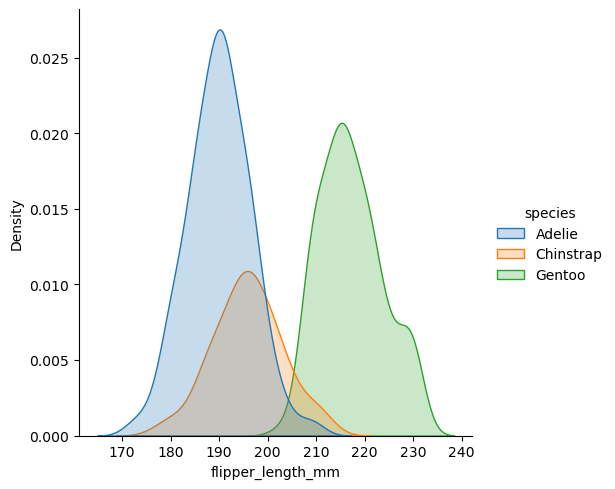

In [21]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel density estimation pitfalls
KDE plots have many advantages. Important features of the data are easy to discern (central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values

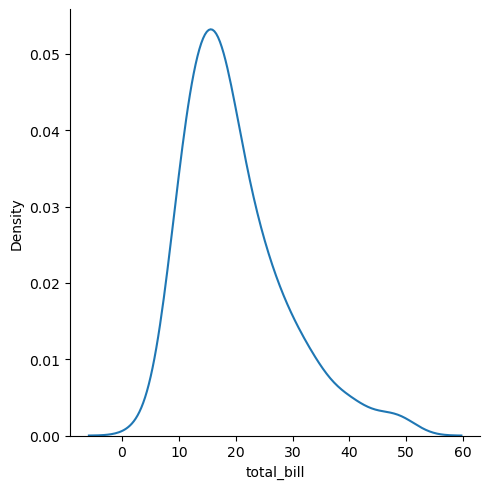

In [22]:
sns.displot(tips, x="total_bill", kind="kde")

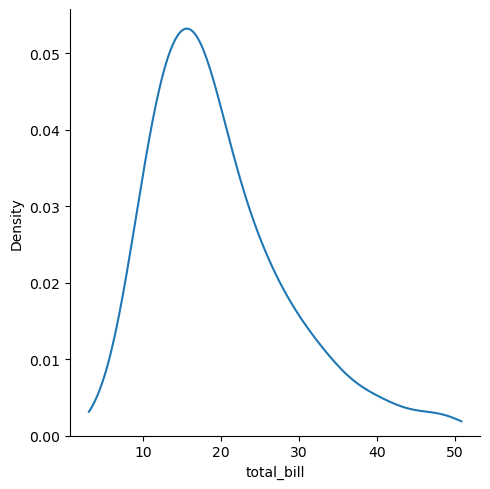

In [23]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

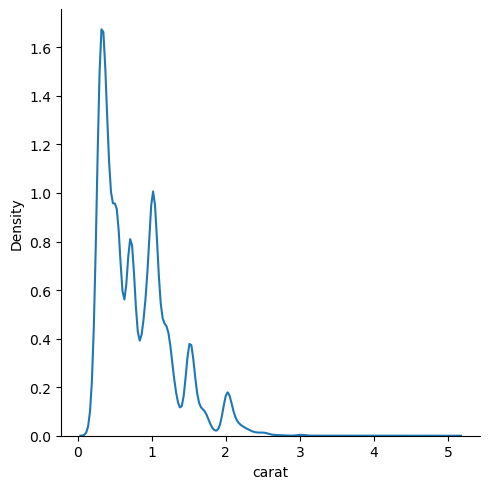

In [24]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

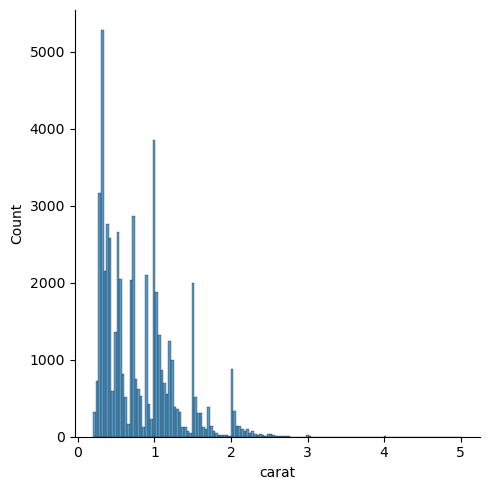

In [25]:
sns.displot(diamonds, x="carat")

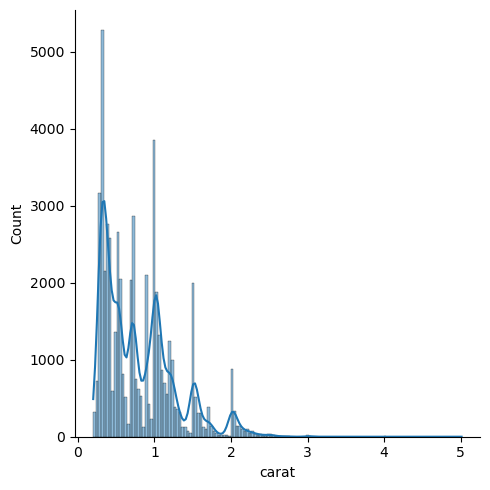

In [26]:
sns.displot(diamonds, x="carat", kde=True)

### Empirical cumulative distributions
A third option for visualizing distributions computes the “empirical cumulative distribution function” (ECDF). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value

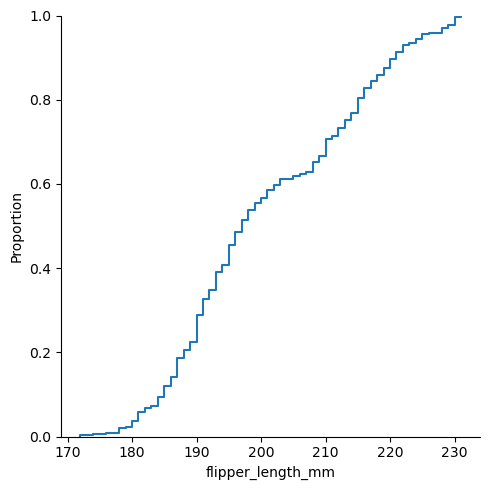

In [27]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

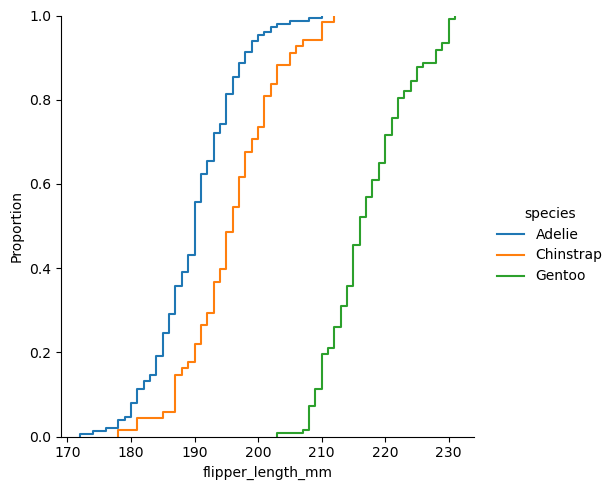

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

### Visualizing bivariate distributions
All of the examples so far have considered univariate distributions: distributions of a single variable, perhaps conditional on a second variable assigned to hue. Assigning a second variable to y, however, will plot a bivariate distribution

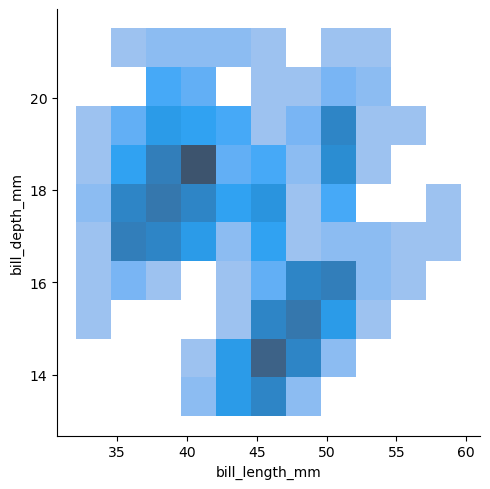

In [29]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

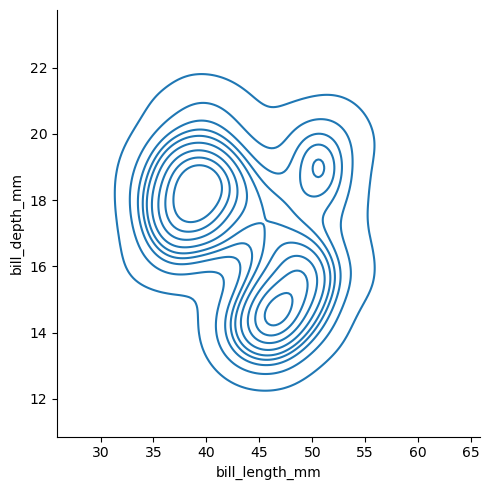

In [30]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

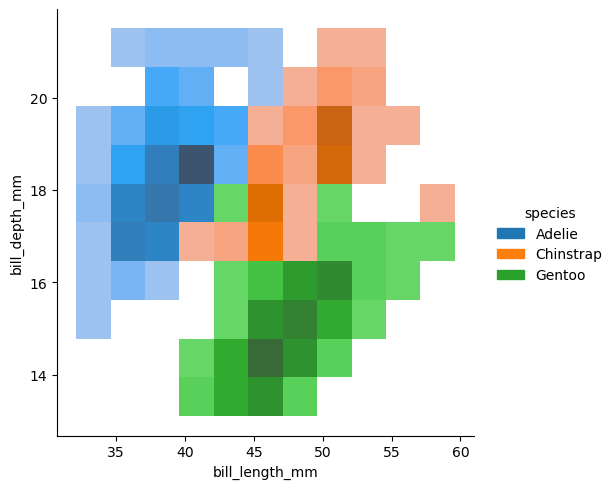

In [31]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

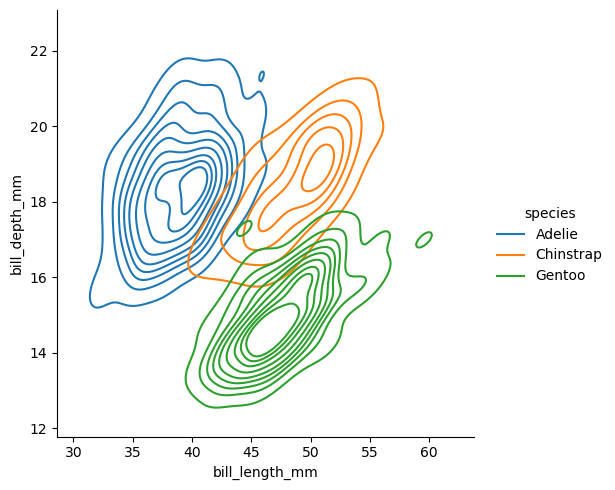

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

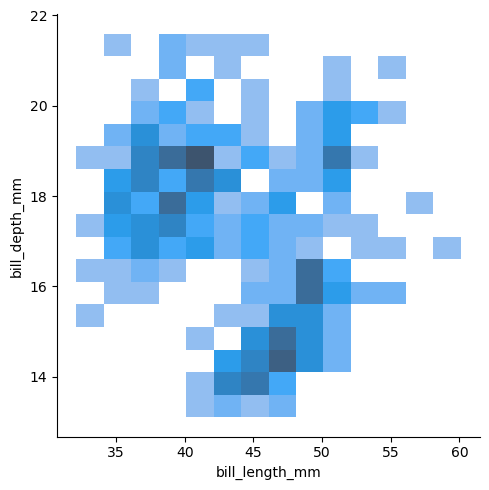

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

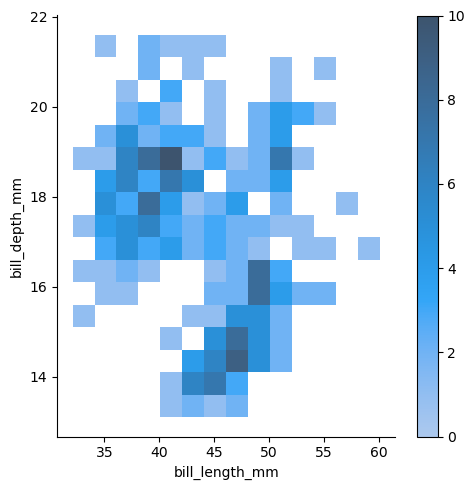

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

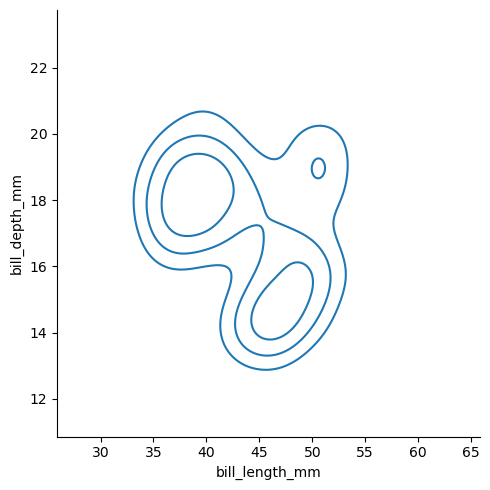

In [35]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

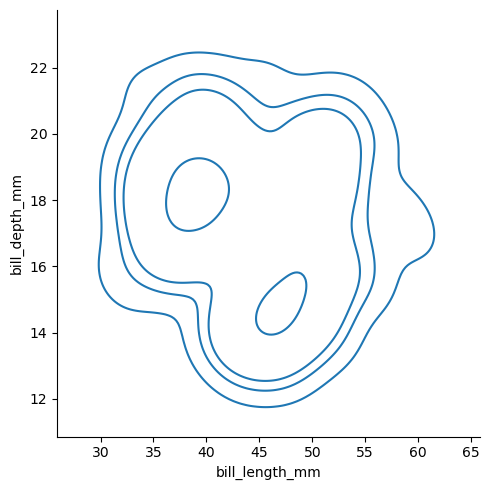

In [36]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

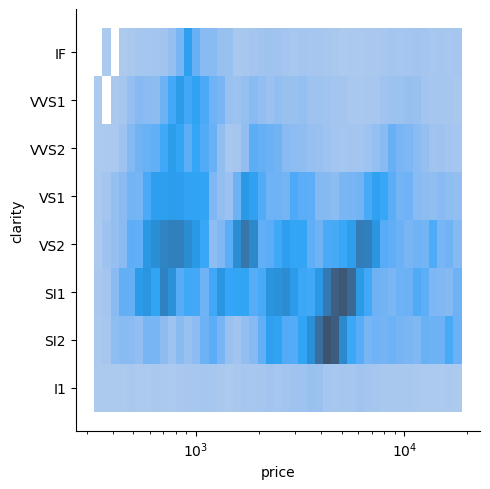

In [37]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

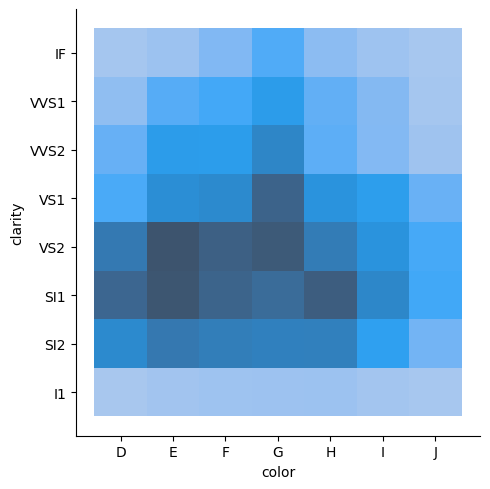

In [38]:
sns.displot(diamonds, x="color", y="clarity")

## Distribution visualization in other settings
Several other figure-level plotting functions in seaborn make use of the histplot() and kdeplot() functions.

### Plotting joint and marginal distributions
The first is jointplot(), which augments a bivariate relational or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot()

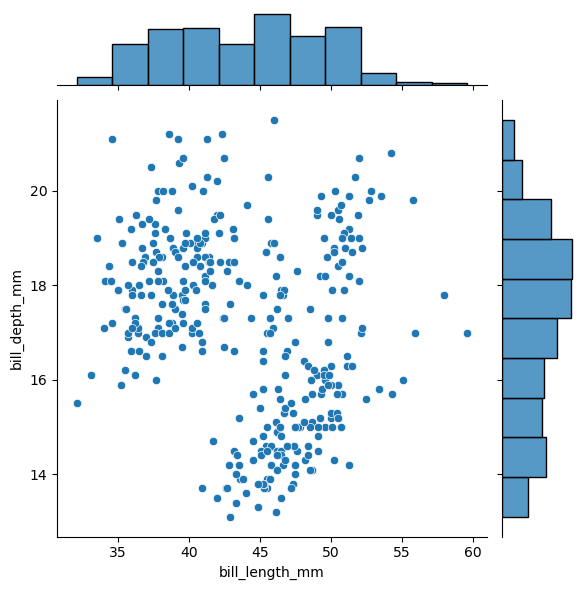

In [39]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

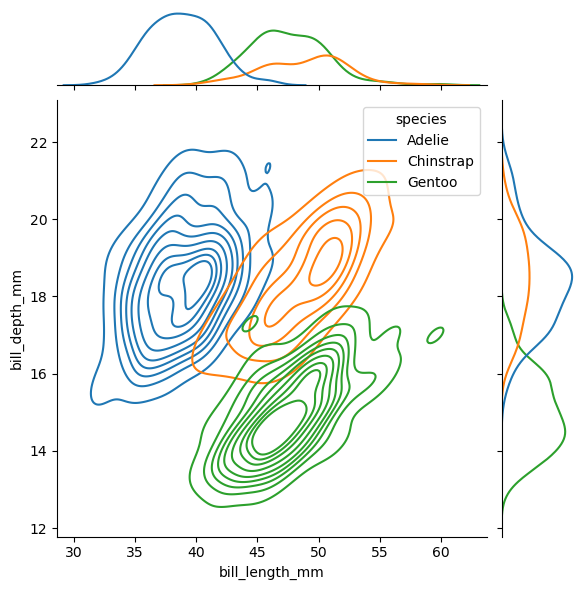

In [40]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

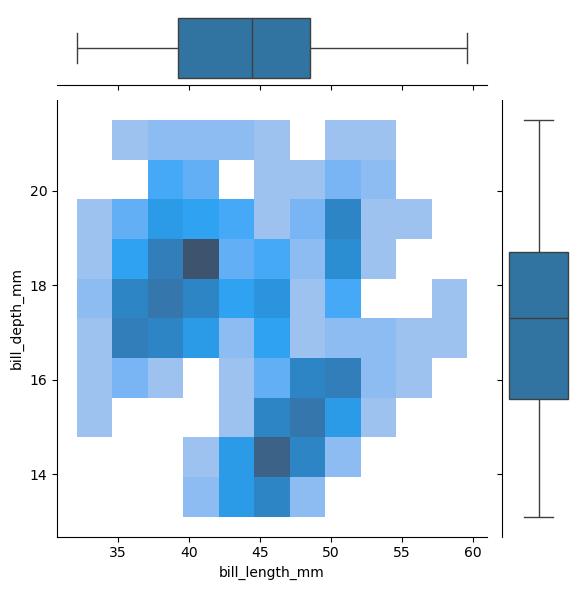

In [41]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

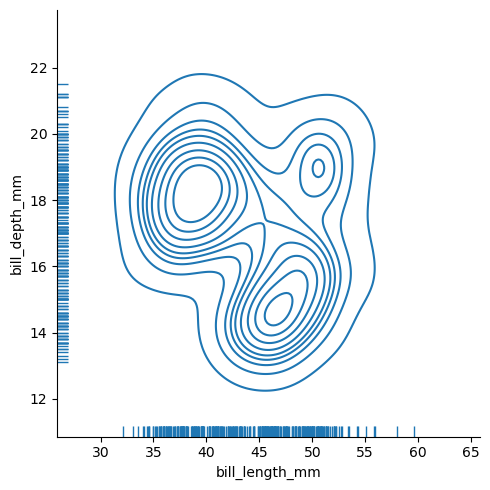

In [42]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

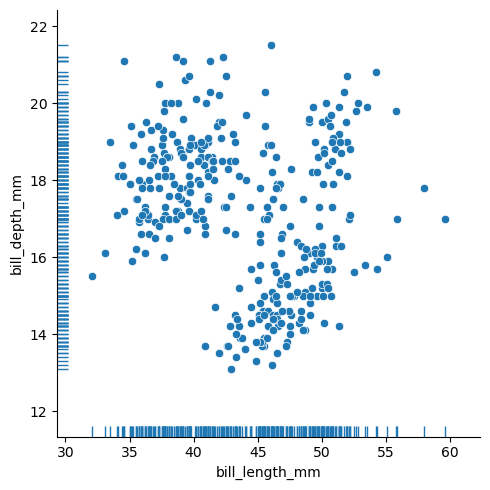

In [43]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions
The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships

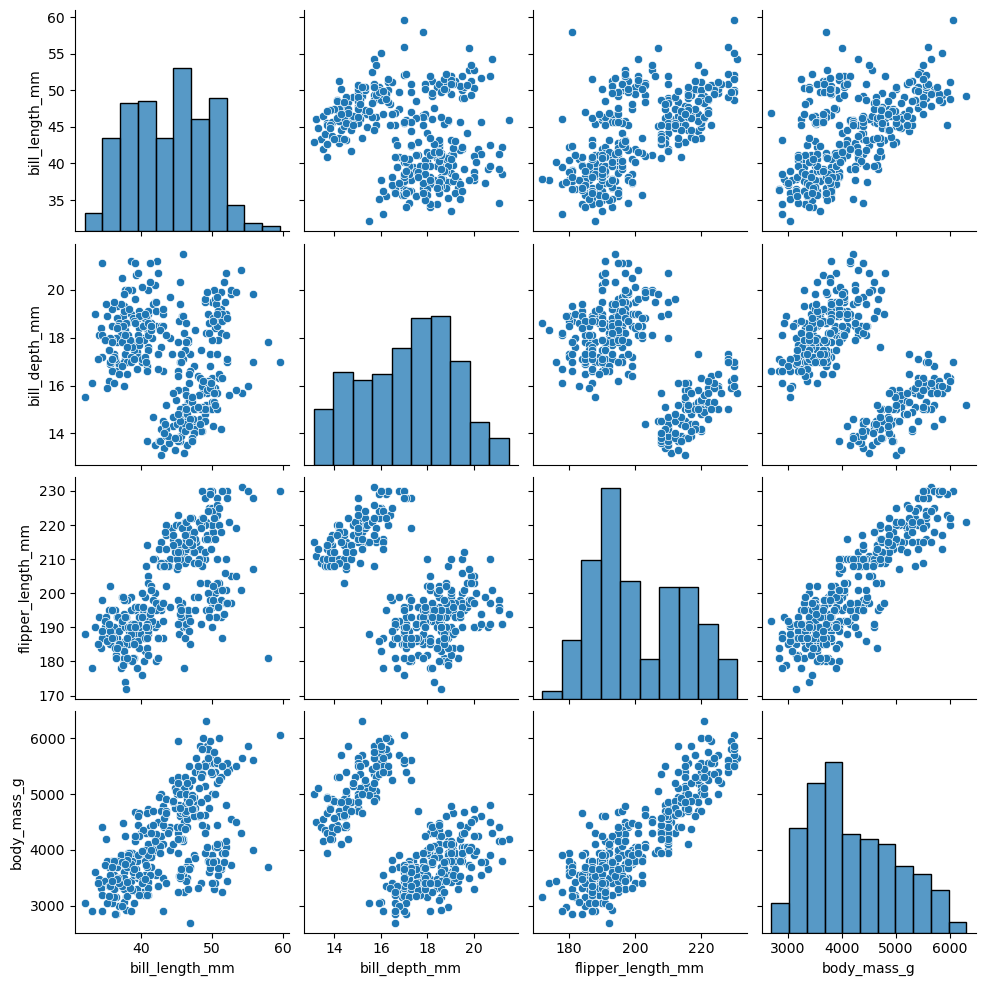

In [44]:
sns.pairplot(penguins)

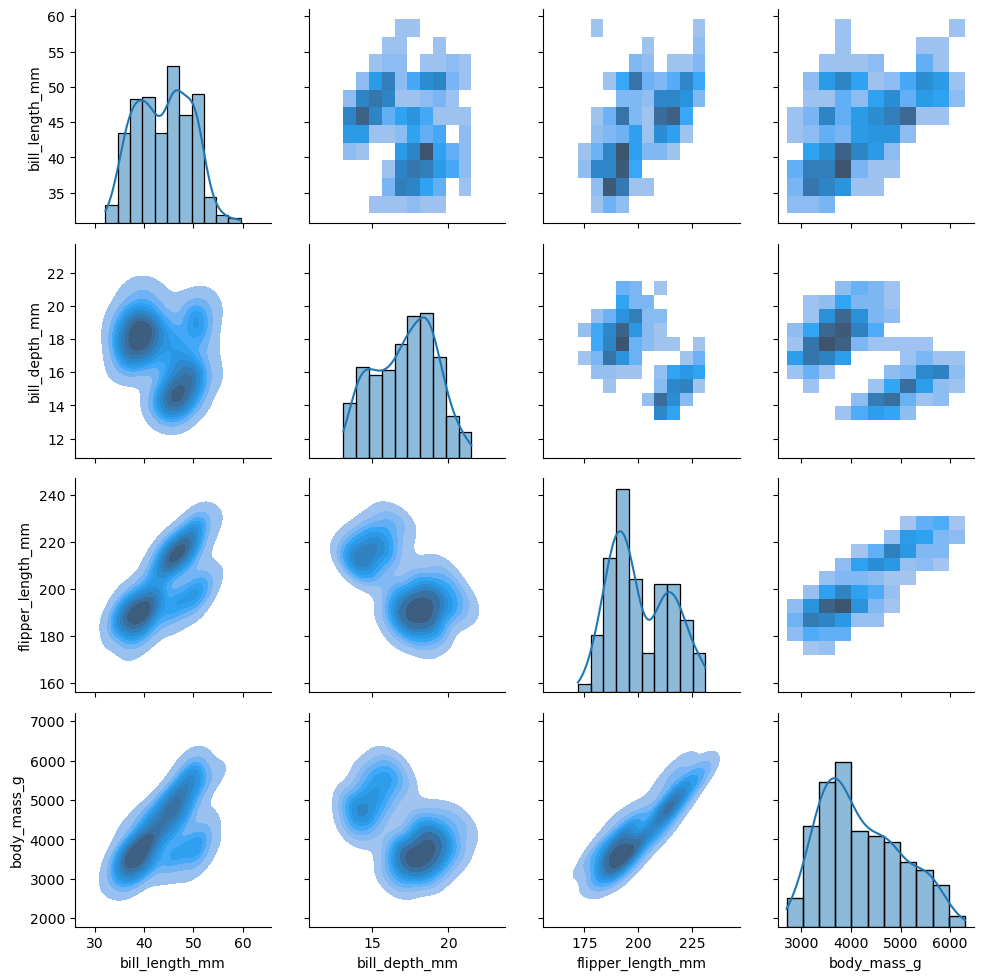

In [45]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)